# TP01 - Probabilités & Statistiques
 _Gregory Sedykh, Michel Donnet, Noah Munz_

## Exercice 1. Lancé d'une pièce
**On considère une pièce truquée qui renvoie pile avec probabilité $p ∈ [0,1]$, et face avec probabilité $1 −p$.
On lance la pièce, et on gagne 1 point si l’on obtient pile, 0 point si l’on obtient face.**

On commence par importer les modules nécessaires et définir quelques fonction de plot qui nous serons utiles pour la suite.

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plotVS(plot_x, plot_f1, plot_f2, title: str, xlabel: str, ylabel: str, f1Label: str, f2Label: str):
    """Plots two functions against each other.  
    - plot_x: the x-axis values
    - plot_f1: the y-values of the first function
    - plot_f2: the y-values of the second function
    - title: the title of the plot
    - xlabel: the label of the x-axis
    - ylabel: the label of the y-axis
    - f1Label: the label of the first function
    - f2Label: the label of the second function
    """
    
    plt.tight_layout()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(plot_x, plot_f1, '-k', label=f1Label, linewidth=1.3)
    plt.plot(plot_x, plot_f2, '-r', label=f2Label, linewidth=1.3)
    plt.legend(prop={'size': 5})
    plt.legend(fontsize=7)
    #plt.legend()
    plt.grid()
    plt.show()


---

**(a)** Écrire une fonction qui prend pour argument un réel $p ∈ [0,1]$, et qui simule ce lancé de pièce, c’est-à-dire qui renvoie 1 avec probabilité $p$ ou 0 avec probabilité $1 −p$. La fonction devra tester si p est bien dans [0,1] et afficher un message d’erreur dans le cas contraire.

La fonction `bt(p, nb=1)` ci-dessous effectue, simule le "_bernoulli trial_" $B(p, 1-p)$ demandé. Elle prend également un paramètre optionnel `nb` qui indique le nombre de simulations à realiser (par défaut 1).

In [3]:
def bt(p, nb=1) -> np.ndarray:
    """Bernoulli Trials, where p(1) := p, p(0) := 1-p"""
    if nb < 1: return np.array([])
    if p < 0 or p > 1:
        mess = f"function bt, Probability p={p} is not in [0, 1]."
        print(mess)
        raise ValueError(mess)
    dist = [1 - p, p] # distribution of B(p)
    return np.random.choice(2, 1, p=dist)[0] if nb == 1 else np.random.choice(2, nb, p=dist)

def countWins(p, nb):
    wins = np.longfloat(bt(p, nb).sum(dtype=np.longfloat))
    return (wins, np.longfloat(nb)-wins)


---

**(b)** Simuler 10000 lancés de pièce en prenant $p=\frac{1}{4}$ et compter la proportion de cas pour lesquels on obtient 1. Vos résultats sont-ils cohérents ?



---
La fonction `countWins(p, nb)` va effectuer `nb` bernoulli trials et compter le nombre de succès et d'échec.
i.e. `countWins(p, nb)` = $(\sum_{i=1}^{nb}{bt(p)},\ nb -\sum_{i=1}^{nb}{bt(p)})$

On simule donc 10'000 lancers de pièce, avec une probabilité de 1/4 d'obtenir pile et on compte le tout avec la fonction présenté ci-dessus.

In [8]:
def proba_simulation():
    p = np.longfloat(0.25)
    n = 10000
    print("For p =", p, "and", n, "trials, we get:")
    wins, losses = countWins(p, n)
    print(f"{wins} wins and {losses} losses.")
    wPerc = np.longfloat(wins / n) # using longfloat due to insufficient precision
    mag = len(str(wPerc))  # magnitude
    lPerc = round(1 - wPerc, mag) #rouding to significant digits (i.e. magnitude of wPerc)
    print(f"i.e. {wPerc*100}% wins and {lPerc*100}% losses")

    distance = round(np.fabs(wPerc-p), mag)
    print(f"Measured probability distribution was only {distance*100}% away from the required one.")

proba_simulation()

For p = 0.25 and 10000 trials, we get:
2489.0 wins and 7511.0 losses.
i.e. 24.89% wins and 75.11% losses
Measured probability distribution was only 0.11% away from the required one.


Le résultat est cohérent, on retrouve une proportion qui diffère de moins d'un demi-pourcent de la probabilité requise $p$


---

**(c)** Écrire une fonction qui prend pour arguments un entier naturel $n$ non nul, et un réel $p∈[0,1]$, et qui renvoie le nombre de points obtenus après $n$ lancés.





L'implémentation de cette fonction étant déjà pratique pour répondre à la question **(b)**, elle a déjà été réalisé. En effet, c'est simplement la fonction `countWins(p, nb)`




---
**(d.1)** On peut considérer le total de points après $n$ lancés comme une variable aléatoire $X: \Omega \rightarrow \{0,1,...,n\}$. Quelle loi suit alors $X$ ?

On remarque que $X$ suit une loi binomiale $B(nb,\ p)$.
En effet, on a vu dans le cours que si pour une somme $S_n$ de $n$ variables aléatoires, elles suivent toutes une loi de Bernoulli $B(p,\ 1-p)$, alors $S_n$ suit une loi binomiale $B(n, p)$.

On implémente donc la fonction `binomial(p, n, k)` qui retourne la probabilité qu'une variable aléatoire $X$ soit égale à $k$, si $X$ suit une loi binomiale. ($k \leq n \in \mathbb{N}$). i.e. la quantitée:
    $$
    P(X=k) = \binom{n}{k}p^k(1-p)^{1-k}
    $$

(on peut donc vérifier que notre variable aléatoire $X$ (qui modélise le total de points après $n$ lancés) suit bien une loi binomiale, en vérifiant si l'égalité ci-dessus tient pour tout $k \leq n \in \mathbb{N}$)

In [5]:
# sums of n independent Bernoulli trials === binomial distribution with param B(n, p)
def binomial(n, p, k):
    tmp = np.longfloat(np.math.comb(n, k)) * np.longfloat(p ** k)
    out = np.longfloat((1-p) ** (n-k))
    return tmp * out

**(d.2)** Utiliser cette propriété pour écrire une autre fonction permettant de renvoyer le nombre de points obtenus après $n$ lancés.

Si on veut pouvoir exprimer le nombre de points $k$ obtenu après $n$ lancés à partir de la loi binomial, on doit prendre l'espérance $\mathbb{E}[X]$ de notre variable aléatoire $X$ qui suit cette loi $B(n,\ p)$. En effet, la formule ci-dessus stipule une condition (nécessaire et suffisante) pour qu'une variable aléatoire suive $B(n,\ p)$ (i.e. que la relation tienne $k$), mais elle ne nous indique que le probabilité, pas le nombre de points.

Alors que l'espérance, quant à elle, va nous retourner le nombre de points "attendus" pour justement ces $n$ lancers, en faisant la moyenne des points pondérée par leur probabilité (définie par $B(n, p)$).

On implémente donc la fonction `expected_value(P, ys)` qui calcule $\mathbb{E}[Y]$ pour une variable aléatoire $Y$ qui suit une distribution $P$.

In [6]:
def expected_value(P, ys):
    """ P: probability distribution of random variable to compute exp value from
        ys: range of random variable (i.e. != values) """
    return np.array([P(yi)*yi for yi in ys], dtype=np.longfloat).sum()



---

**(e)** Vérifier que les deux fonctions précédentes permettent bien de modéliser la même variable aléatoire.

Pour vérifier ceci on va plot pour $n$ de $100$ à $1000$ (par tranche de 100)
la somme "manuelle" des $n$ variables aléatoires de Bernoulli (`plot_f2`) et
l'espérance de $X$ qui suit la loi binomiale (`plot_f1`).
(le tout pour $p=0.25$)

f1 [25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 174.99999999999997, 200.0, 225.0, 250.0]

f2 [27.0, 56.0, 85.0, 110.0, 120.0, 160.0, 186.0, 197.0, 226.0, 247.0]


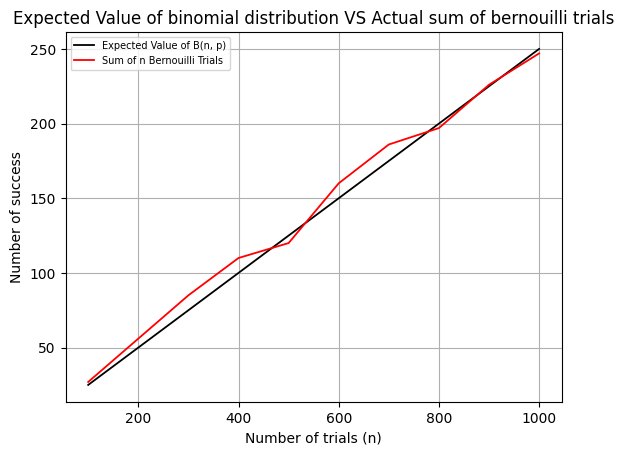

In [14]:
def countWinsBin(p, n):
    def binml(yi): return binomial(n, p, yi)
    return expected_value(binml, np.arange(n+1))

p = 0.25
try:
    x_plot = range(100, 1001, 100)
    # Computed expected number of points out of n trials (according to binomial distribution)
    plot_f1 = [countWinsBin(p, x) for x in x_plot]
    # Actual number of points out of n trials
    plot_f2 = [countWins(p, x)[0] for x in x_plot]

    # plot_f1 and plot_f2 should be really close

    print("f1", plot_f1)
    print("\nf2", plot_f2)

    plotVS(x_plot, plot_f1, plot_f2,
           "Expected Value of binomial distribution VS Actual sum of bernouilli trials",
           "Number of trials (n)",
           "Number of success",
           "Expected Value of B(n, p)",
           "Sum of n Bernouilli Trials")
    plt.show()

except ValueError as ve:
    print("Caught Exception:\n   ", "ValueError:", ve)

print("")

On peut voir que les 2 courbes "théorique" (noir) et "réelle", (rouge) sont très proches. On voit bien que la somme des bernoulli trials suit bien une loi binomiale et que $\mathbb{E}[X]$ pour $X$ qui suit $B(n, p)$ représente bien le "vrai" nombre de succès/points pour n lancés.